# day2 some basic analysis on matches dataset

In [52]:

import pandas as pd
df = pd.read_csv(r"Downloads/matches_cleaned.csv")
df.head()


,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,18-04-2008,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,Normal,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,19-04-2008,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,Normal,MR Benson,SL Shastri
2,335984,2007/08,Delhi,19-04-2008,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,Normal,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,20-04-2008,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,Normal,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,20-04-2008,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,Normal,BF Bowden,K Hariharan


In [53]:
# no of matches played by all teams
matches_per_team = df['team1'].value_counts() + df['team2'].value_counts()
matches_per_team = matches_per_team.sort_values(ascending=False)
print(matches_per_team)


Mumbai Indians                 261
Kolkata Knight Riders          251
Royal Challengers Bangalore    240
Chennai Super Kings            238
Rajasthan Royals               221
Kings XI Punjab                190
Sunrisers Hyderabad            182
Delhi Daredevils               161
Delhi Capitals                  91
Deccan Chargers                 75
Punjab Kings                    56
Pune Warriors                   46
Gujarat Titans                  45
Lucknow Super Giants            44
Gujarat Lions                   30
Rising Pune Supergiant          16
Royal Challengers Bengaluru     15
Kochi Tuskers Kerala            14
Rising Pune Supergiants         14
Name: count, dtype: int64


In [54]:
# most sucessfull teams in the ipl
wins = df['winner'].value_counts().sort_values(ascending=False)
print("Most Successful Team(s):")
print(wins)


Most Successful Team(s):
winner
Mumbai Indians                 144
Chennai Super Kings            138
Kolkata Knight Riders          131
Royal Challengers Bangalore    116
Rajasthan Royals               112
Kings XI Punjab                 88
Sunrisers Hyderabad             88
Delhi Daredevils                67
Delhi Capitals                  48
Deccan Chargers                 29
Gujarat Titans                  28
Lucknow Super Giants            24
Punjab Kings                    24
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Royal Challengers Bengaluru      7
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: count, dtype: int64


In [55]:
# no of wins when batiing first or chasing
bat_first_wins = df[(df['toss_decision'] == 'bat') & (df['toss_winner'] == df['winner'])].shape[0]
field_first_wins = df[(df['toss_decision'] == 'field') & (df['toss_winner'] == df['winner'])].shape[0]

print(f"Wins when batting first: {bat_first_wins}")
print(f"Wins when fielding first: {field_first_wins}")



Wins when batting first: 177
Wins when fielding first: 377


In [56]:
# venues with most matches played
venue_counts = df['venue'].value_counts()
print(venue_counts)



venue
Eden Gardens                                                             77
Wankhede Stadium                                                         73
M Chinnaswamy Stadium                                                    65
Feroz Shah Kotla                                                         60
Rajiv Gandhi International Stadium, Uppal                                49
MA Chidambaram Stadium, Chepauk                                          48
Sawai Mansingh Stadium                                                   47
Dubai International Cricket Stadium                                      46
Wankhede Stadium, Mumbai                                                 45
Punjab Cricket Association Stadium, Mohali                               35
Sheikh Zayed Stadium                                                     29
Sharjah Cricket Stadium                                                  28
MA Chidambaram Stadium, Chepauk, Chennai                                 28
Narend

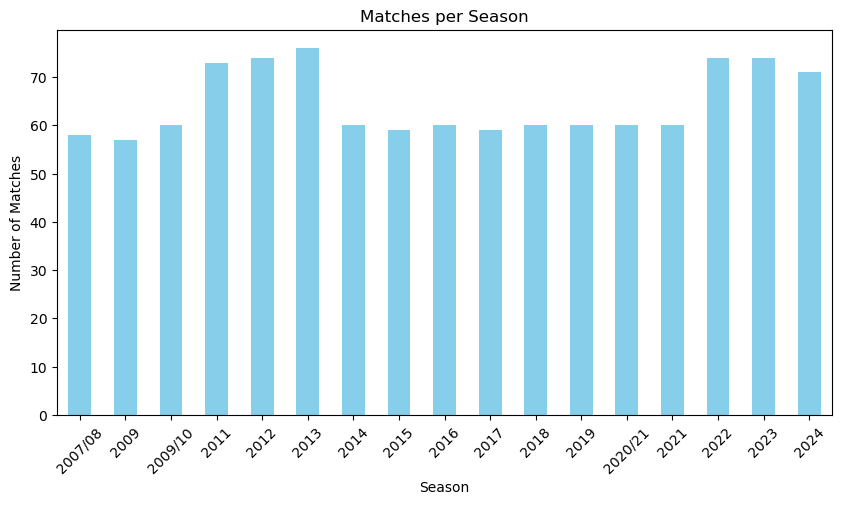

In [57]:
# matches per season
import matplotlib.pyplot as plt

matches_per_season = df['season'].value_counts().sort_index()
matches_per_season.plot(kind='bar', figsize=(10, 5), color='skyblue')
plt.title('Matches per Season')
plt.xlabel('Season')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.show()



In [58]:
# toss winners vs match winners
same_winner = (df['toss_winner'] == df['winner']).sum()
total = df.shape[0]
print(f"Toss winner also won the match in {same_winner} out of {total} matches.")


Toss winner also won the match in 554 out of 1095 matches.


In [67]:
# win percentage by toss decision
decisions = df[df['toss_winner'] == df['winner']]['toss_decision'].value_counts()
print("Win based on Toss Decision:\n", decisions)


Win based on Toss Decision:
 toss_decision
field    377
bat      177
Name: count, dtype: int64
